In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1KOow_IXqnX6IvvUvh4-7F7p2Pj_uDVCb")
df.head()


,Date,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
0,2024-01-01,2914.533936,1038.321777,5727.949707,3327.104004,1096.853394,6647.077148,1675.343018,659.398193,1007.435730,...,28304.263672,1241.662476,781.448975,133.963882,3665.432861,1262.217896,3665.156982,10402.311523,592.700012,233.428848
1,2024-01-02,2929.719971,1068.593994,5724.263184,3322.450439,1092.406982,6611.317871,1685.136841,671.232849,1016.037842,...,27933.277344,1277.082153,775.320801,133.724396,3638.599121,1243.680786,3686.188232,10144.540039,594.450012,229.539612
2,2024-01-03,3000.255371,1084.299805,5746.128906,3305.061035,1097.752808,6930.176270,1676.592285,667.144897,1029.463013,...,28065.740234,1279.446777,772.404968,129.653290,3550.644531,1210.693848,3681.005371,10051.939453,586.849976,223.033035
3,2024-01-04,2995.559814,1112.986572,5740.052734,3311.281982,1122.533691,6866.345215,1700.876831,696.121582,1042.092651,...,28201.138672,1293.585205,786.539429,128.599579,3526.648193,1213.904907,3707.568359,9955.759766,587.650024,221.320786
4,2024-01-05,3003.852051,1143.754272,5732.133301,3287.377686,1136.073120,6922.240723,1708.422119,696.627441,1040.799805,...,26873.916016,1281.023193,781.794983,128.024826,3595.030762,1214.683472,3700.441650,9957.001953,581.250000,223.375488


In [29]:
df['Date'] = pd.to_datetime(df['Date'])

In [30]:
df.set_index('Date', inplace=True)

In [31]:
df=df.dropna()

In [32]:
#(Today Price - Yesterday Price) / Yesterday Price
#pct_change() - Calculates percentage change

daily_returns = df.pct_change().dropna()
daily_returns.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SHREECEM.NS,SUNPHARMA.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02,0.005210,0.029155,-0.000644,-0.001399,-0.004054,-0.005380,0.005846,0.017948,0.008539,0.009291,...,-0.013107,0.028526,-0.007842,-0.001788,-0.007321,-0.014686,0.005738,-0.024780,0.002953,-0.016661
2024-01-03,0.024076,0.014698,0.003820,-0.005234,0.004894,0.048229,-0.005071,-0.006090,0.013213,0.010521,...,0.004742,0.001852,-0.003761,-0.030444,-0.024173,-0.026524,-0.001406,-0.009128,-0.012785,-0.028346
2024-01-04,-0.001565,0.026456,-0.001057,0.001882,0.022574,-0.009211,0.014484,0.043434,0.012268,-0.018219,...,0.004824,0.011050,0.018299,-0.008127,-0.006758,0.002652,0.007216,-0.009568,0.001363,-0.007677
2024-01-05,0.002768,0.027644,-0.001380,-0.007219,0.012061,0.008141,0.004436,0.000727,-0.001241,0.000994,...,-0.047063,-0.009711,-0.006032,-0.004469,0.019390,0.000641,-0.001922,0.000125,-0.010891,0.009284
2024-01-08,-0.014335,0.012649,-0.012556,-0.017032,-0.013149,0.000767,-0.007692,0.003223,0.002341,0.004193,...,0.011336,0.003923,-0.002339,-0.012346,-0.015945,-0.015501,-0.001751,-0.008142,-0.035011,-0.013688


## **Calculate ROI (Return on Investment)**

In [33]:
roi =daily_returns.mean()*252

#252 - Approx Trading days in year

In [34]:
volatility = daily_returns.std() * np.sqrt(252)

#std()- standard deviation (risk), sqrt(252) → annualizes volatility

In [35]:
summary = pd.DataFrame({
    "ROI": roi,
    "Volatility": volatility
})

summary

,ROI,Volatility
ADANIENT.NS,-0.009926,0.428525
ADANIPORTS.NS,0.306464,0.383095
APOLLOHOSP.NS,0.158224,0.223925
ASIANPAINT.NS,-0.265357,0.210709
AXISBANK.NS,0.091106,0.247676
BAJAJ-AUTO.NS,0.229088,0.286382
BAJAJFINSV.NS,0.166604,0.252094
BAJFINANCE.NS,0.277279,0.271769
BHARTIARTL.NS,0.471403,0.233787
BPCL.NS,0.343541,0.338707


*   ROI should be higher than average
*   Risk should be lower than average



# **Allocate Investment (Inverse Volatility)**

In [36]:
roi_threshold = summary['ROI'].median()
vol_threshold = summary['Volatility'].median()

selected_stocks = summary[
    (summary['ROI'] > roi_threshold) &
    (summary['Volatility'] < vol_threshold)
].copy() # Explicitly create a copy to avoid SettingWithCopyWarning

inv_vol = 1 / selected_stocks['Volatility']
weights = inv_vol / inv_vol.sum()

selected_stocks

,ROI,Volatility
APOLLOHOSP.NS,0.158224,0.223925
BHARTIARTL.NS,0.471403,0.233787
CIPLA.NS,0.152257,0.250687
GRASIM.NS,0.165664,0.243591
HDFCLIFE.NS,0.162507,0.242225
ICICIBANK.NS,0.295545,0.205043
MARUTI.NS,0.163690,0.227560
SBILIFE.NS,0.204216,0.247756
SUNPHARMA.NS,0.240927,0.211524


In [37]:
inv_vol = 1 / selected_stocks['Volatility']
weights = inv_vol / inv_vol.sum()


In [38]:
selected_stocks['Weight'] = weights
selected_stocks

,ROI,Volatility,Weight
APOLLOHOSP.NS,0.158224,0.223925,0.114504
BHARTIARTL.NS,0.471403,0.233787,0.109674
CIPLA.NS,0.152257,0.250687,0.102280
GRASIM.NS,0.165664,0.243591,0.105259
HDFCLIFE.NS,0.162507,0.242225,0.105853
ICICIBANK.NS,0.295545,0.205043,0.125048
MARUTI.NS,0.163690,0.227560,0.112675
SBILIFE.NS,0.204216,0.247756,0.103490
SUNPHARMA.NS,0.240927,0.211524,0.121217


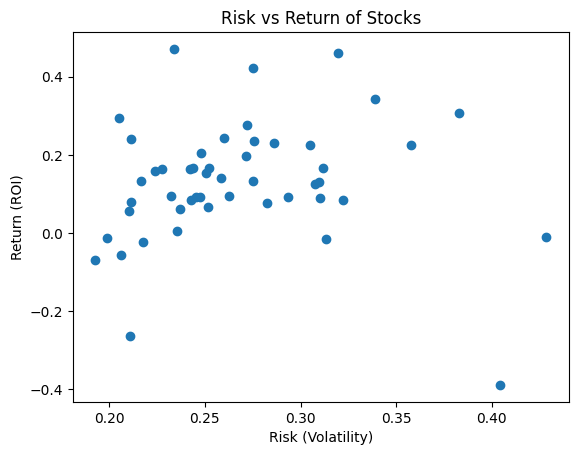

In [39]:
plt.figure()
plt.scatter(summary['Volatility'], summary['ROI'])

plt.xlabel("Risk (Volatility)")
plt.ylabel("Return (ROI)")
plt.title("Risk vs Return of Stocks")

plt.show()


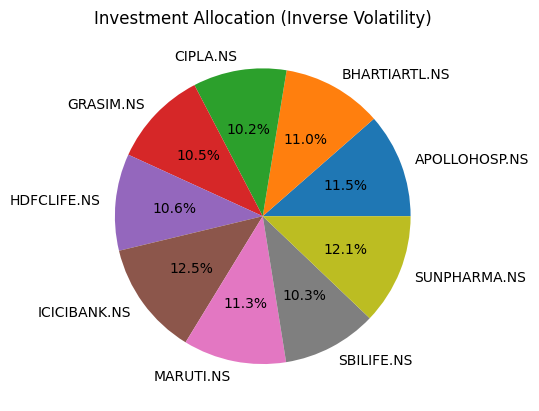

In [40]:
selected_stocks['Weight'] = weights
plt.figure()
plt.pie(
    selected_stocks['Weight'],
    labels=selected_stocks.index,
    autopct='%1.1f%%'
)
plt.title("Investment Allocation (Inverse Volatility)")
plt.show()

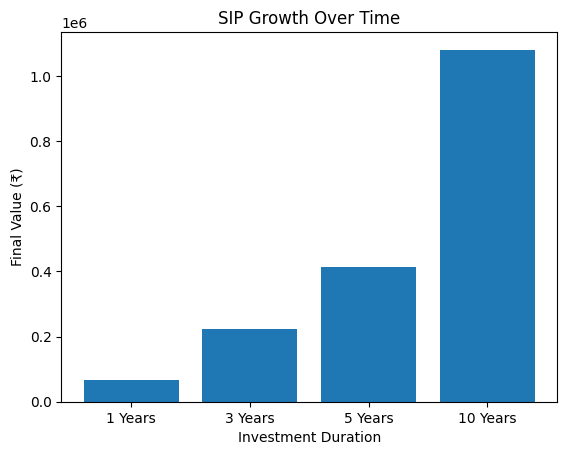

In [41]:
plt.figure()
plt.bar(results.keys(), results.values())

plt.xlabel("Investment Duration")
plt.ylabel("Final Value (₹)")
plt.title("SIP Growth Over Time")

plt.show()


In [42]:
def sip_growth(monthly_invest, months, monthly_rate):
    total = 0
    for i in range(months):
        total = (total + monthly_invest) * (1 + monthly_rate)
    return total


In [43]:
years = [1, 3, 5, 10]
investment = 5000

annual_roi = selected_stocks['ROI'].mean()
monthly_roi = annual_roi / 12


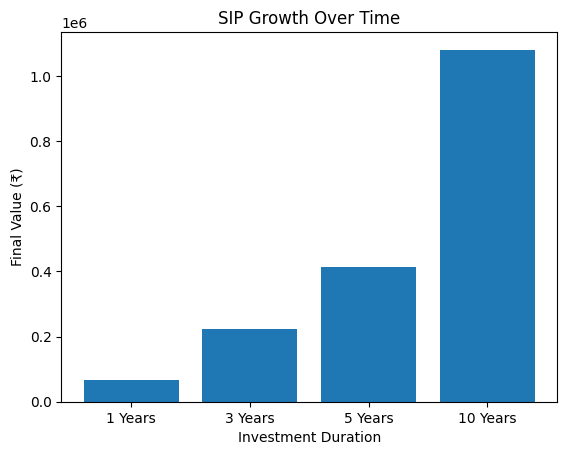

In [44]:
plt.figure()
plt.bar(results.keys(), results.values())

plt.xlabel("Investment Duration")
plt.ylabel("Final Value (₹)")
plt.title("SIP Growth Over Time")

plt.show()


In [45]:
labels = list(results.keys())
values = list(results.values())

results = {}

for y in years:
    total = 0
    monthly = investment

    for year in range(y):
        total += sip_growth(monthly, 12, monthly_roi)
        monthly *= 1.10   # 10% yearly increase

    results[f"{y} Years"] = total


In [46]:
values = list(results.values()) # Define values from the results dictionary
growth_pct = [0]  # No growth % for first bar

for i in range(1, len(values)):
    pct = ((values[i] - values[i-1]) / values[i-1]) * 100
    growth_pct.append(pct)


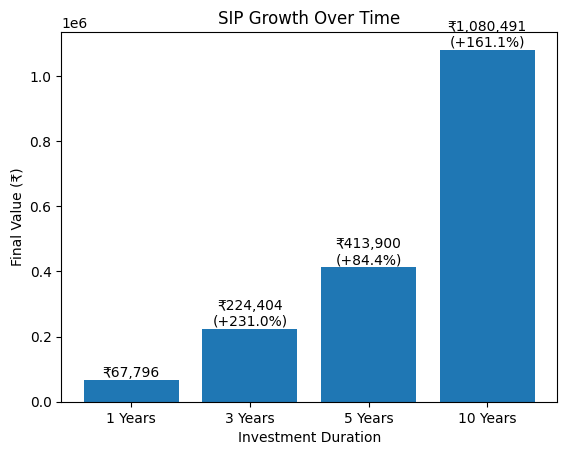

In [47]:
plt.figure()
bars = plt.bar(labels, values)

plt.xlabel("Investment Duration")
plt.ylabel("Final Value (₹)")
plt.title("SIP Growth Over Time")

# Add labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()

    if i == 0:
        label = f"₹{height:,.0f}"
    else:
        label = f"₹{height:,.0f}\n(+{growth_pct[i]:.1f}%)"

    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        label,
        ha='center',
        va='bottom'
    )

plt.show()
